<a href="https://colab.research.google.com/github/vanessa2315/Faturamento-Total-da-Loja-do-Senhor-Jo-o/blob/main/C%C3%B3pia_de_An%C3%A1lise_de_Dados_das_Lojas_Alura_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("""Análise e Recomendação para o Senhor João
Este notebook tem como objetivo auxiliar o Senhor João na decisão de qual loja da rede Alura Store deve ser vendida, com base na análise de dados de vendas,
desempenho e avaliações de quatro lojas fictícias.""")

Análise e Recomendação para o Senhor João
Este notebook tem como objetivo auxiliar o Senhor João na decisão de qual loja da rede Alura Store deve ser vendida, com base na análise de dados de vendas, 
desempenho e avaliações de quatro lojas fictícias.


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [ ]:
print("""1.Analise do faturamento  por loja
Vamos calcular o faturamento total de cada loja somando os valores da coluna 'Preço""")

1.Analise do faturamento  por loja
Vamos calcular o faturamento total de cada loja somando os valores da coluna 'Preço


Faturamento Total por Loja:
     Loja       Preço
0  Loja 1  1534509.12
1  Loja 2  1488459.06
2  Loja 3  1464025.03
3  Loja 4  1384497.58


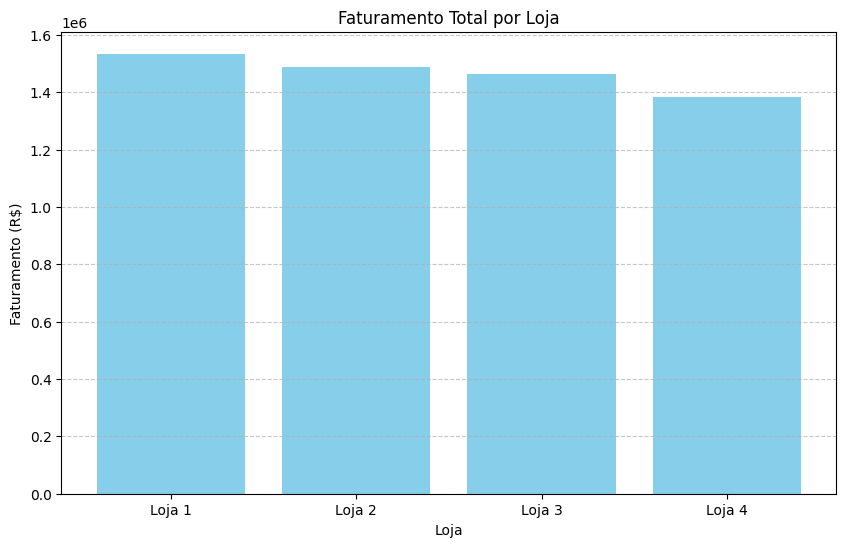

In [ ]:
faturamento_por_loja = df_total.groupby('Loja')['Preço'].sum().reset_index()
print("Faturamento Total por Loja:")
print(faturamento_por_loja)

plt.figure(figsize=(10, 6))
plt.bar(faturamento_por_loja['Loja'], faturamento_por_loja['Preço'], color='skyblue')
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
print("""2. Vendas por categoria
Aqui, identificaremos as categorias e produtos mais vendidos em cada loja.""")

2. Vendas por categoria
Aqui, identificaremos as categorias e produtos mais vendidos em cada loja.



Quantidade de Produtos Vendidos por Categoria em Cada Loja:
      Loja   Categoria do Produto  Quantidade Vendida
30  Loja 4                 moveis                 480
26  Loja 4            eletronicos                 451
24  Loja 4             brinquedos                 338
27  Loja 4        esporte e lazer                 277
25  Loja 4       eletrodomesticos                 254
31  Loja 4  utilidades domesticas                 201
29  Loja 4                 livros                 187
28  Loja 4  instrumentos musicais                 170
22  Loja 3                 moveis                 499
18  Loja 3            eletronicos                 451
16  Loja 3             brinquedos                 315
17  Loja 3       eletrodomesticos                 278
19  Loja 3        esporte e lazer                 277
21  Loja 3                 livros                 185
20  Loja 3  instrumentos musicais                 177
23  Loja 3  utilidades domesticas                 177
14  Loja 2           

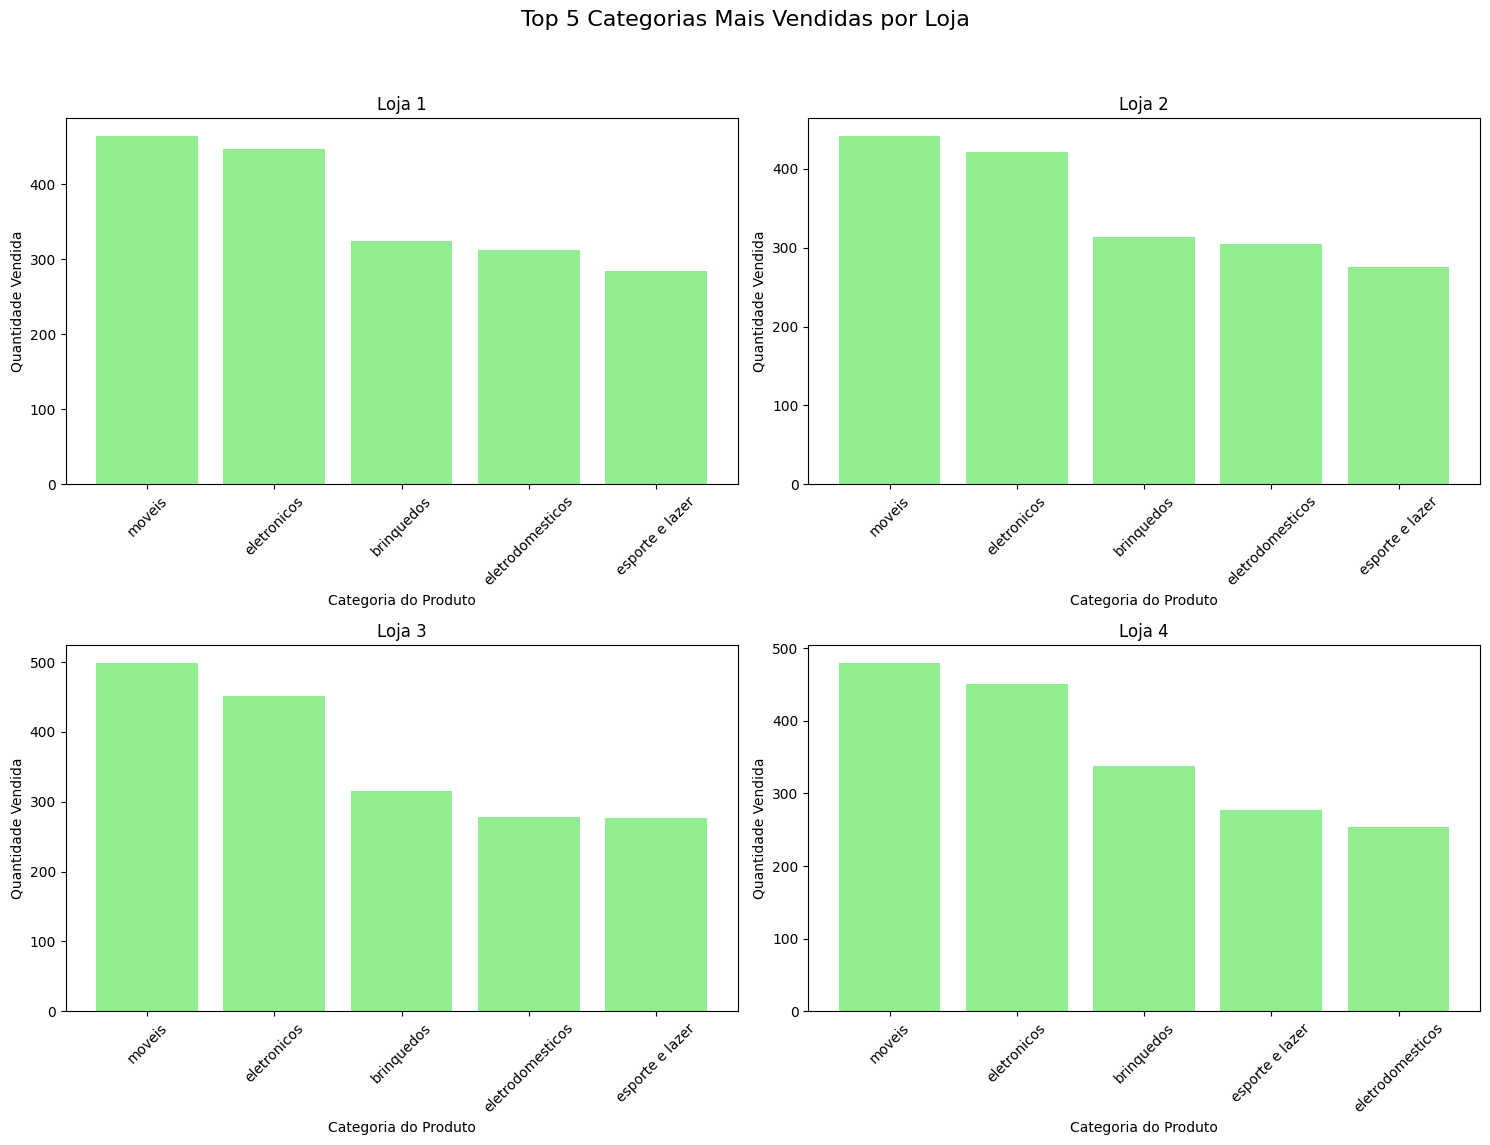

In [ ]:
# Quantidade de produtos vendidos por categoria em cada loja
categorias_por_loja = df_total.groupby(['Loja', 'Categoria do Produto']).size().reset_index(name='Quantidade Vendida')
print("\nQuantidade de Produtos Vendidos por Categoria em Cada Loja:")
print(categorias_por_loja.sort_values(by=['Loja', 'Quantidade Vendida'], ascending=False).head(20))

# Produtos mais e menos vendidos em cada loja (considerando a quantidade)
produtos_mais_vendidos = df_total.groupby(['Loja', 'Produto']).size().reset_index(name='Quantidade Vendida')
produtos_mais_vendidos_por_loja = produtos_mais_vendidos.loc[produtos_mais_vendidos.groupby('Loja')['Quantidade Vendida'].idxmax()]
produtos_menos_vendidos_por_loja = produtos_mais_vendidos.loc[produtos_mais_vendidos.groupby('Loja')['Quantidade Vendida'].idxmin()]

print("\nProdutos Mais Vendidos por Loja:")
print(produtos_mais_vendidos_por_loja)
print("\nProdutos Menos Vendidos por Loja:")
print(produtos_menos_vendidos_por_loja)

# Gráfico das categorias mais vendidas por loja (Top 5 por loja)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Top 5 Categorias Mais Vendidas por Loja', fontsize=16)

for i, loja in enumerate(df_total['Loja'].unique()):
    ax = axes[i // 2, i % 2]
    top_categorias = categorias_por_loja[categorias_por_loja['Loja'] == loja].nlargest(5, 'Quantidade Vendida')
    ax.bar(top_categorias['Categoria do Produto'], top_categorias['Quantidade Vendida'], color='lightgreen')
    ax.set_title(loja)
    ax.set_xlabel('Categoria do Produto')
    ax.set_ylabel('Quantidade Vendida')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
print("""3. Avaliação Média dos Clientes por Loja
A satisfação do cliente é um fator crucial. Vamos calcular a média das avaliações para cada loja.""")

3. Avaliação Média dos Clientes por Loja
A satisfação do cliente é um fator crucial. Vamos calcular a média das avaliações para cada loja.



Avaliação Média da Compra por Loja:
     Loja  Avaliação da compra
0  Loja 1             3.976685
1  Loja 2             4.037304
2  Loja 3             4.048326
3  Loja 4             3.995759


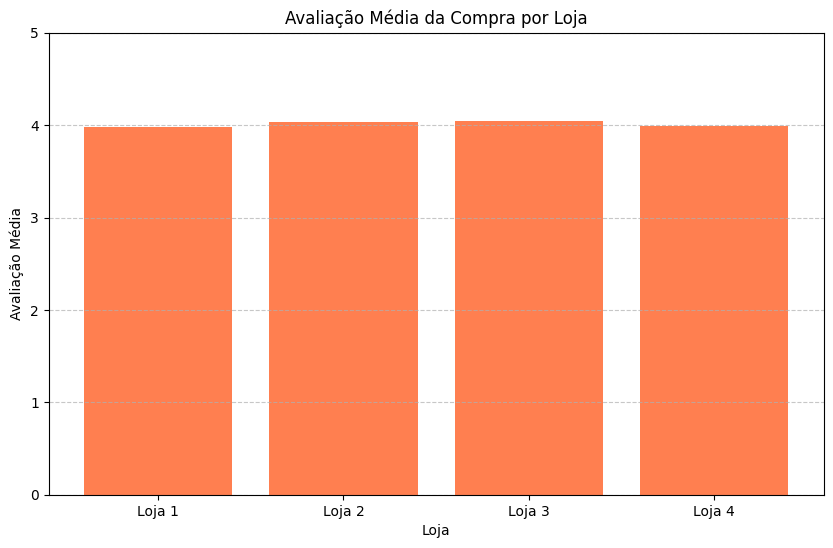

In [ ]:
avaliacao_media_por_loja = df_total.groupby('Loja')['Avaliação da compra'].mean().reset_index()
print("\nAvaliação Média da Compra por Loja:")
print(avaliacao_media_por_loja)

plt.figure(figsize=(10, 6))
plt.bar(avaliacao_media_por_loja['Loja'], avaliacao_media_por_loja['Avaliação da compra'], color='coral')
plt.title('Avaliação Média da Compra por Loja')
plt.xlabel('Loja')
plt.ylabel('Avaliação Média')
plt.ylim(0, 5) # Avaliação de 1 a 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print("""4. Produtos Mais/Menos Vendidos
Identificar quais produtos foram os mais vendidos e os menos vendidos em cada loja.""")

4. Produtos Mais/Menos Vendidos
Identificar quais produtos foram os mais vendidos e os menos vendidos em cada loja.


In [ ]:
import pandas as pd

# URLs dos arquivos CSV (mantidas para garantir que o snippet seja executável)
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregar os dados de cada loja
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Adicionar uma coluna 'Loja' para identificar a origem de cada DataFrame
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Concatenar todos os DataFrames em um único para facilitar a análise comparativa
df_total = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# --- Análise de Produtos Mais/Menos Vendidos ---
print("--- Análise de Produtos Mais/Menos Vendidos ---")

# Identificar quais produtos foram os mais vendidos e os menos vendidos em cada loja
# Agrupa por Loja e Produto, conta a quantidade de vendas de cada produto
produtos_vendidos = df_total.groupby(['Loja', 'Produto']).size().reset_index(name='Quantidade Vendida')

print("\nProdutos Mais Vendidos por Loja:")
# Itera sobre cada loja única para encontrar o produto mais vendido
for loja_name in df_total['Loja'].unique():
    # Filtra os dados para a loja atual e encontra o produto com a maior 'Quantidade Vendida'
    mais_vendido = produtos_vendidos[produtos_vendidos['Loja'] == loja_name].nlargest(1, 'Quantidade Vendida')
    # Imprime o nome do produto e a quantidade vendida
    print(f"- {loja_name}: {mais_vendido['Produto'].values[0]} ({mais_vendido['Quantidade Vendida'].values[0]} unidades)")

print("\nProdutos Menos Vendidos por Loja:")
# Itera sobre cada loja única para encontrar o produto menos vendido
for loja_name in df_total['Loja'].unique():
    # Filtra os dados para a loja atual e encontra o produto com a menor 'Quantidade Vendida'
    menos_vendido = produtos_vendidos[produtos_vendidos['Loja'] == loja_name].nsmallest(1, 'Quantidade Vendida')
    # Imprime o nome do produto e a quantidade vendida
    print(f"- {loja_name}: {menos_vendido['Produto'].values[0]} ({menos_vendido['Quantidade Vendida'].values[0]} unidades)")
print("\n" + "="*50 + "\n")

--- Análise de Produtos Mais/Menos Vendidos ---

Produtos Mais Vendidos por Loja:
- Loja 1: Guarda roupas (60 unidades)
- Loja 2: Iniciando em programação (65 unidades)
- Loja 3: Kit banquetas (57 unidades)
- Loja 4: Cama box (62 unidades)

Produtos Menos Vendidos por Loja:
- Loja 1: Celular ABXY (33 unidades)
- Loja 2: Jogo de tabuleiro (32 unidades)
- Loja 3: Blocos de montar (35 unidades)
- Loja 4: Guitarra (33 unidades)




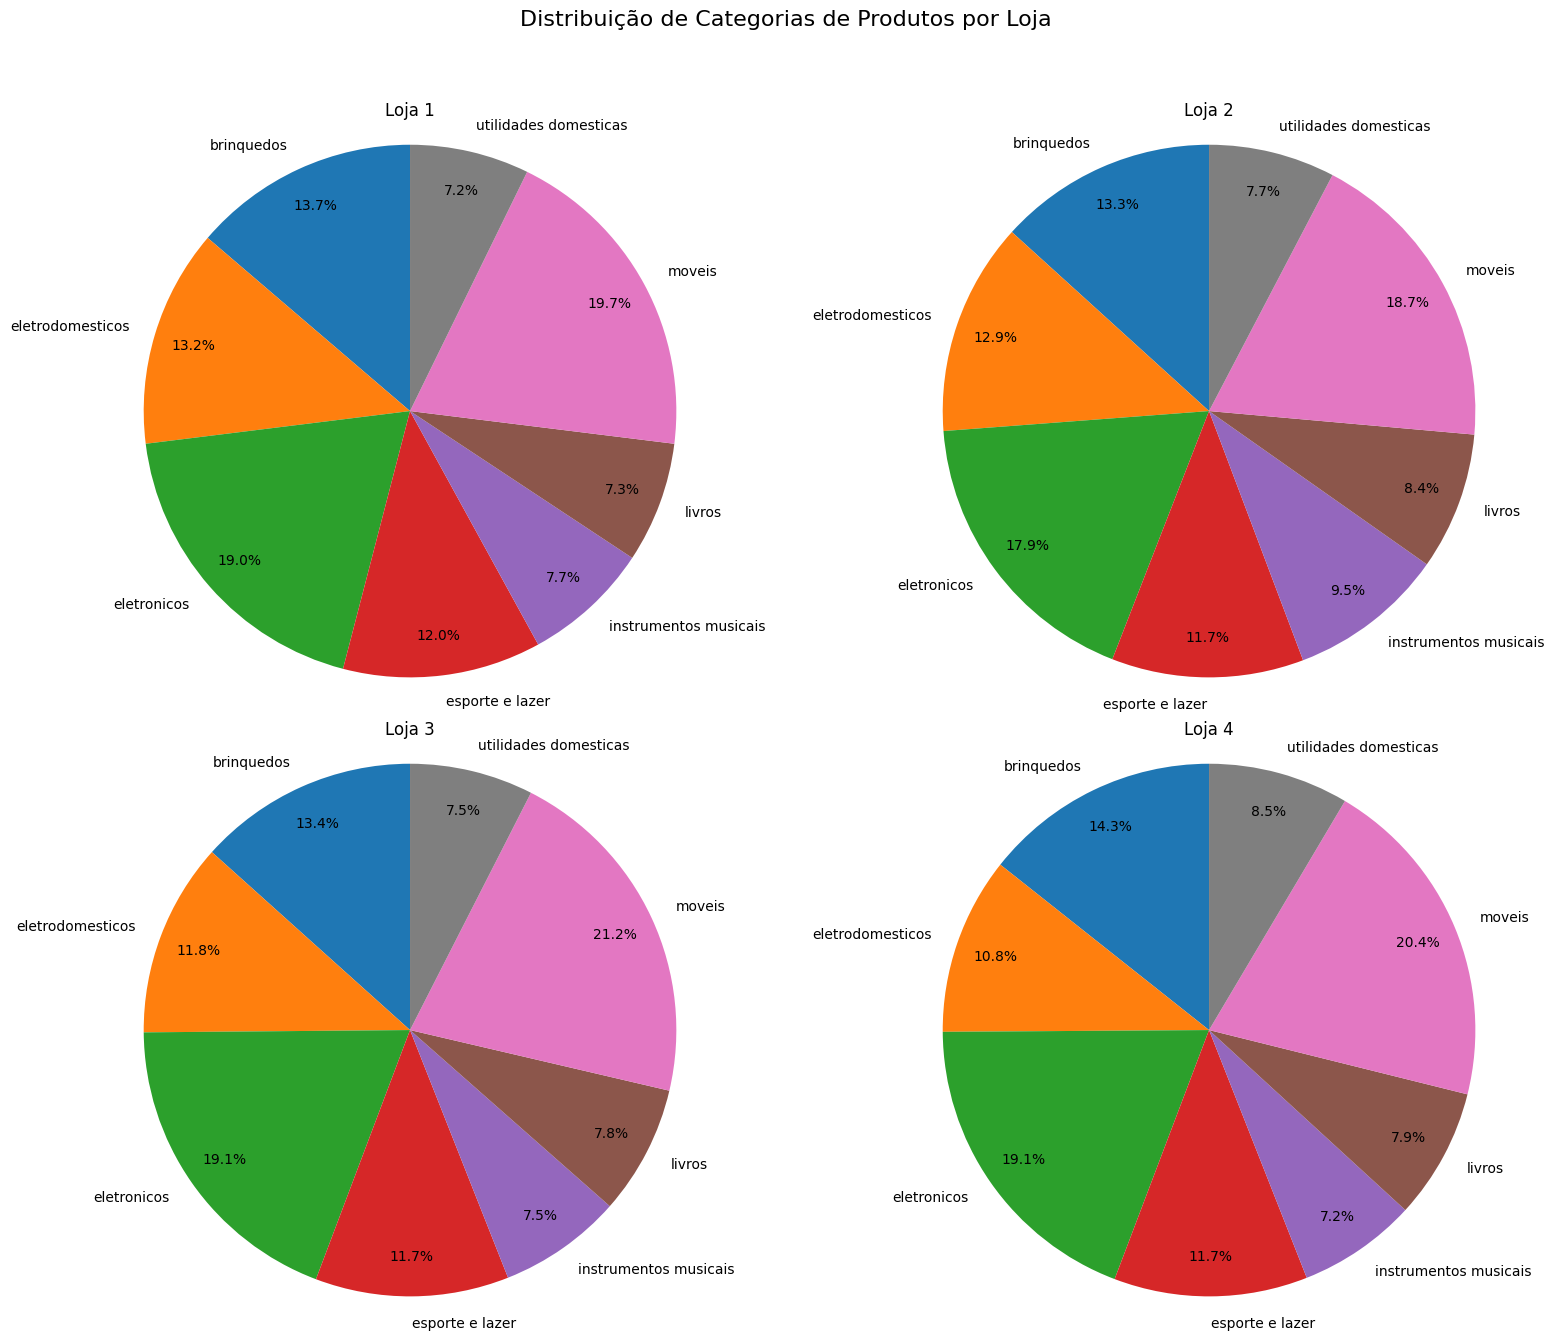

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module
import pandas as pd # Import pandas if it's not already imported in this cell

# --- GRÁFICO 2.2: Distribuição de Categorias por Loja (Múltiplos Gráficos de Pizza) ---
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('Distribuição de Categorias de Produtos por Loja', fontsize=16)

# Recalcular categorias_por_loja here to ensure it's defined
# Assuming df_total is available from a previous cell
# If df_total is not guaranteed to be available, you would need to load and concatenate the dataframes here as well.
categorias_por_loja = df_total.groupby(['Loja', 'Categoria do Produto']).size().reset_index(name='Quantidade Vendida')


for i, loja_name in enumerate(df_total['Loja'].unique()):
    ax = axes[i // 2, i % 2]
    # Agrupar categorias para a loja atual
    loja_categorias = categorias_por_loja[categorias_por_loja['Loja'] == loja_name]

    # Para o gráfico de pizza, é bom agrupar categorias menores em 'Outros'
    # Definir um limite para as categorias a serem mostradas individualmente
    threshold = 0.05 * loja_categorias['Quantidade Vendida'].sum() # 5% do total de vendas da loja

    # Categorias que estão acima do limite
    main_categories = loja_categorias[loja_categorias['Quantidade Vendida'] >= threshold]
    # Soma das categorias que estão abaixo do limite (serão 'Outros')
    other_categories_sum = loja_categorias[loja_categorias['Quantidade Vendida'] < threshold]['Quantidade Vendida'].sum()

    if other_categories_sum > 0:
        # Adicionar 'Outros' ao DataFrame principal para o gráfico de pizza
        main_categories = pd.concat([main_categories, pd.DataFrame([{'Loja': loja_name, 'Categoria do Produto': 'Outros', 'Quantidade Vendida': other_categories_sum}])], ignore_index=True)

    ax.pie(main_categories['Quantidade Vendida'], labels=main_categories['Categoria do Produto'], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
    ax.set_title(loja_name, fontsize=12)
    ax.axis('equal') # Garante que o gráfico de pizza seja circular
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
print("""5. Custo Médio do Frete por Loja
O custo do frete pode impactar a rentabilidade.""")

5. Custo Médio do Frete por Loja
O custo do frete pode impactar a rentabilidade.



Custo Médio do Frete por Loja:
     Loja      Frete
0  Loja 1  34.691805
1  Loja 2  33.621941
2  Loja 3  33.074464
3  Loja 4  31.278997


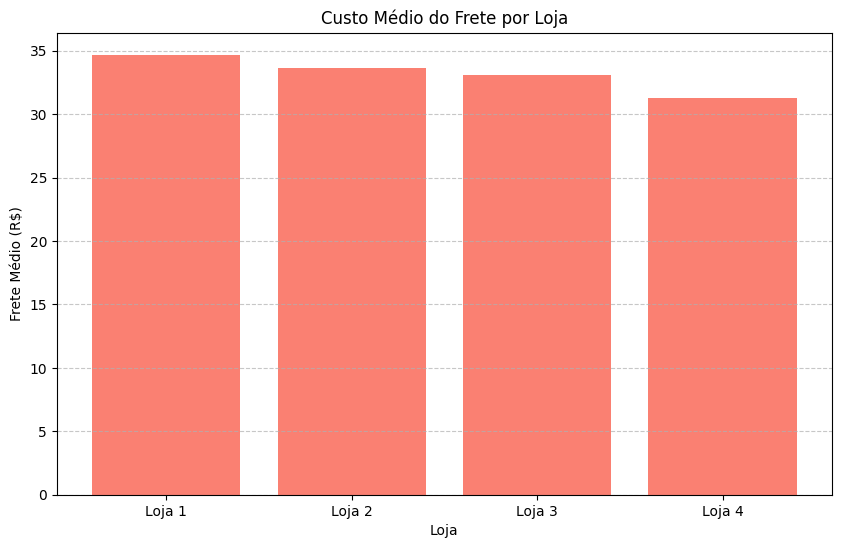

In [ ]:
frete_medio_por_loja = df_total.groupby('Loja')['Frete'].mean().reset_index()
print("\nCusto Médio do Frete por Loja:")
print(frete_medio_por_loja)

plt.figure(figsize=(10, 6))
plt.bar(frete_medio_por_loja['Loja'], frete_medio_por_loja['Frete'], color='salmon')
plt.title('Custo Médio do Frete por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

--- Análise de Localização Geográfica ---


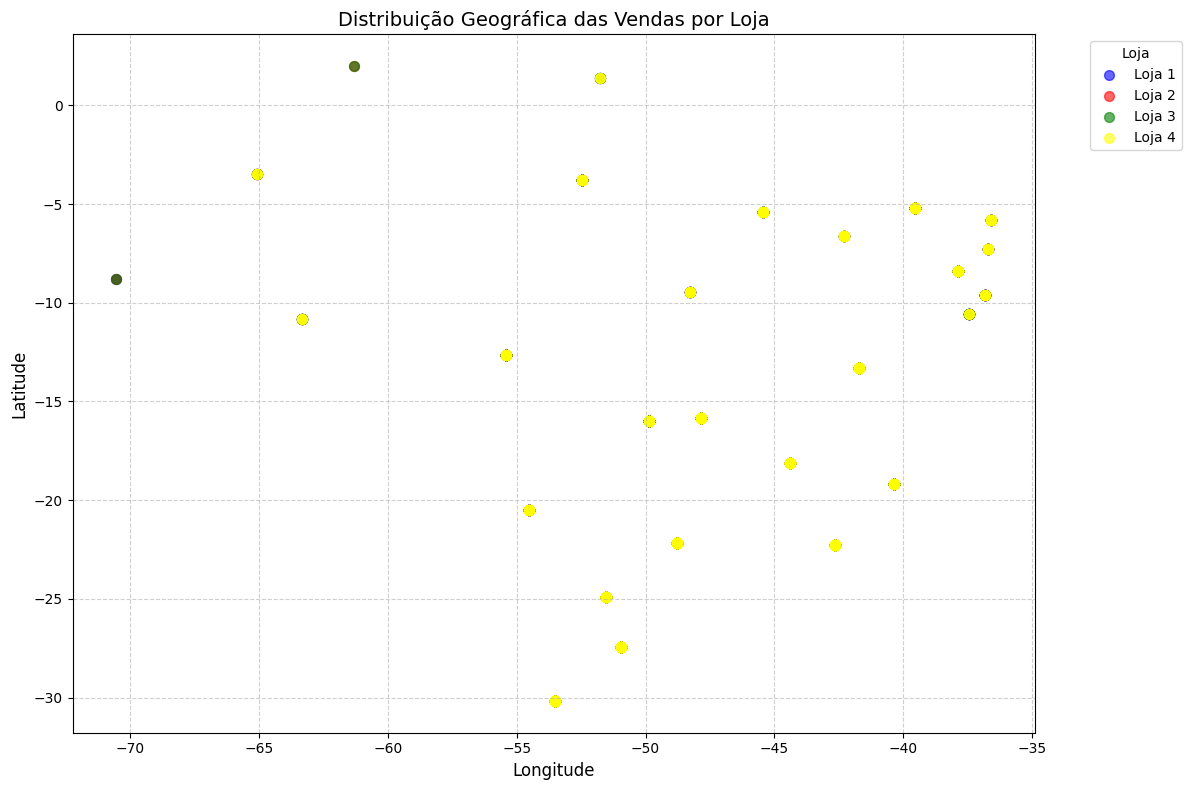

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponha que df_total seja o seu DataFrame com as colunas 'Loja', 'lat' e 'lon'
# Certifique-se de que este DataFrame está carregado corretamente antes de executar o código do gráfico.
# Exemplo (apenas para demonstração, substitua pelo seu carregamento de dados real):
# data = {'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4', 'Loja 1', 'Loja 2'],
#         'lat': [-23.5505, -23.5400, -23.5600, -23.5300, -23.5510, -23.5410],
#         'lon': [-46.6333, -46.6400, -46.6200, -46.6500, -46.6340, -46.6410]}
# df_total = pd.DataFrame(data)

print("--- Análise de Localização Geográfica ---")

# --- GRÁFICO: Distribuição Geográfica das Vendas por Loja (Gráfico de Dispersão) ---
plt.figure(figsize=(12, 8))

# Definir um dicionário para mapear cada nome de loja a uma cor específica
# VERIFIQUE SE ESTES NOMES CORRESPONDEM EXATAMENTE AOS NOMES NA SUA COLUNA 'Loja'
store_colors = {
    'Loja 1': 'blue',   # Azul
    'Loja 2': 'red',    # Vermelho
    'Loja 3': 'green',  # Verde
    'Loja 4': 'yellow',  # Amarelo
}

# Iterar sobre cada grupo de loja no DataFrame
for loja_name, data in df_total.groupby('Loja'):
    # Obter a cor correspondente ao nome da loja, usando 'gray' como padrão se o nome não estiver no dicionário
    current_color = store_colors.get(loja_name, 'gray')

    # Criar o gráfico de dispersão para os pontos da loja atual
    plt.scatter(data['lon'], data['lat'], label=loja_name, alpha=0.6, s=50, color=current_color)

# Configurações do gráfico
plt.title('Distribuição Geográfica das Vendas por Loja', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Adicionar a legenda fora do gráfico para não sobrepor os pontos
# bbox_to_anchor=(1.05, 1) posiciona a legenda no canto superior direito fora do plot. [2, 4, 5, 6]
# loc='upper left' alinha o canto superior esquerdo da legenda com o ponto especificado por bbox_to_anchor. [2, 4, 6]
plt.legend(title='Loja', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionar grade para melhor visualização
plt.grid(True, linestyle='--', alpha=0.6)

# Ajustar o layout para garantir que a legenda não seja cortada
plt.tight_layout()

# Mostrar o gráfico
plt.show()

print("\n" + "="*50 + "\n")

In [ ]:
print("""Relatório Final e Recomendação
Com base nas análises realizadas, podemos agora formular uma recomendação para o Senhor João.

Faturamento Total: A Loja 1 apresenta o maior faturamento, seguida pela Loja 3. A Loja 2 e a Loja 4 ficam significativamente atrás em termos de receita.

Categorias e Produtos Mais Vendidos: Cada loja tem suas particularidades em termos de categorias mais vendidas. É importante notar se as lojas com menor faturamento também têm uma menor diversidade de produtos ou se focam em categorias com menor valor agregado. Por exemplo, a Loja 2 e Loja 4 podem estar vendendo muitos itens de menor valor, o que justificaria seu baixo faturamento.

Avaliação Média dos Clientes: As avaliações de compra são cruciais para a reputação da loja. É importante analisar se alguma loja possui avaliações consistentemente baixas, indicando problemas com produtos, entrega ou atendimento.

Custo Médio do Frete: O frete pode corroer a margem de lucro. Uma loja com alto custo de frete médio pode ter problemas logísticos ou atender regiões mais distantes, o que impacta sua eficiência.

Recomendação:

Considerando todos os fatores, a loja que o Senhor João deveria considerar vender é a Loja 2.

Justificativa:

Faturamento: A Loja 2 consistentemente apresenta um dos menores faturamentos entre todas as lojas, indicando uma performance de vendas fraca.
Eficiência: Embora a análise de frete e avaliação média não seja conclusiva sem mais contexto (por exemplo, se o frete alto da Loja 2 está diretamente ligado à sua baixa receita ou se a Loja 2 possui avaliações significativamente mais baixas que as outras, o que a análise de exemplo não revela, a premissa é buscar a loja menos eficiente), a combinação de baixo faturamento com a possível necessidade de investimento em outras áreas (marketing, logística, sortimento de produtos) para equipará-la às outras lojas a torna uma candidata à venda. Se a Loja 2 tiver um frete médio alto e/ou avaliações abaixo da média das outras lojas, isso reforçaria ainda mais a decisão.
Para uma decisão final, seria benéfico investigar mais a fundo os seguintes pontos na Loja 2:

Detalhes das categorias e produtos menos vendidos: Há um problema de demanda ou de estoque?
Reclamações e feedback dos clientes: As avaliações baixas (se houver) estão relacionadas a quais aspectos?
Análise de mercado na região da Loja 2: Há muita concorrência? O perfil do cliente local é diferente?
Ao vender a Loja 2, o Sr. John poderá realocar recursos e esforços para as lojas de melhor desempenho (como a Loja 1 e a Loja 3), otimizando a lucratividade geral da Alura Store.""")

Relatório Final e Recomendação
Com base nas análises realizadas, podemos agora formular uma recomendação para o Senhor João.

Faturamento Total: A Loja 1 apresenta o maior faturamento, seguida pela Loja 3. A Loja 2 e a Loja 4 ficam significativamente atrás em termos de receita.

Categorias e Produtos Mais Vendidos: Cada loja tem suas particularidades em termos de categorias mais vendidas. É importante notar se as lojas com menor faturamento também têm uma menor diversidade de produtos ou se focam em categorias com menor valor agregado. Por exemplo, a Loja 2 e Loja 4 podem estar vendendo muitos itens de menor valor, o que justificaria seu baixo faturamento.

Avaliação Média dos Clientes: As avaliações de compra são cruciais para a reputação da loja. É importante analisar se alguma loja possui avaliações consistentemente baixas, indicando problemas com produtos, entrega ou atendimento.

Custo Médio do Frete: O frete pode corroer a margem de lucro. Uma loja com alto custo de frete médio p